# Perform online segmentation

In [1]:
%cd ../dev/
from dataset_creation_aprovis3d import aprovis3dDataset
from hots.utils import get_loader, fit_mlr, predict_mlr, make_histogram_classification, score_classif_events

/home/antoine/homhots/aprovhots/dev


In [13]:
path = '../../Data/RGB_frames2events/'
# gives the data type - here we use experimental data, stored as npy
data_type = 'synthetic'
# gives a patch_size to divide spatially the event streams
patch_size = (16,16)
# gives a max duration for the samples of the dataset to divide temporally the event streams
max_duration = 1e3 # (in ms)
# labels given to the different classes of the dataset
labelz = ['sea','gro']
# original sensor_size of the DVS (width,height,polarity)
sensor_size = [672, 376, 2]
# discard samples with less than min_num_events events
min_num_events = 1000
# split the recordings into train and test sets with train_test_ratio ratio
train_test_ratio = .75
# gives the indexing of the event stream
ordering = 'xytp'

trainset = aprovis3dDataset(save_to=path, data_type=data_type, classes=labelz, train=True, patch_size=patch_size, max_duration=max_duration, sensor_size=sensor_size)
testset = aprovis3dDataset(save_to=path, data_type=data_type, classes=labelz, train=False, patch_size=patch_size, max_duration=max_duration, sensor_size=sensor_size)
trainloader = get_loader(trainset)
testloader = get_loader(testset)

num_sample_train = len(trainloader)
num_sample_test = len(testloader)
n_classes = len(trainset.classes)
print(f'number of samples in the training set: {len(trainloader)}')
print(f'number of samples in the testing set: {len(testloader)}')

number of samples in the training set: 1827
number of samples in the testing set: 216


## Example with only one layer of Multinomial Logistic Regression (MLR)

In [3]:
jitter = (None, None)
num_workers = 0
learning_rate = 0.005
betas = (0.9, 0.999)
num_epochs = 2 ** 5 + 1
N_polarities = 2
ts_size = (trainset.sensor_size[0],trainset.sensor_size[1],N_polarities)
tau_cla = 1e4
date = '2023-01-03'
mlr_layer_name = f'{date}_LR_{tau_cla}_{ts_size}_{learning_rate}_{betas}_{num_epochs}_{jitter}.pkl'

model_path = '../Records/networks/' + mlr_layer_name
results_path = f'../Records/LR_results/' + mlr_layer_name

trainloader = get_loader(trainset)
classif_layer, losses = fit_mlr(trainloader, model_path, tau_cla, learning_rate, betas, num_epochs, ts_size, trainset.ordering, len(trainset.classes))

device -> cuda


  3%|███████                                                                                                                                                                                                                                | 1/33 [06:35<3:31:03, 395.74s/it]

Loss for epoch number 0: 0.532


  6%|██████████████                                                                                                                                                                                                                         | 2/33 [13:11<3:24:25, 395.66s/it]

Loss for epoch number 1: 0.502


  9%|█████████████████████                                                                                                                                                                                                                  | 3/33 [19:48<3:18:10, 396.34s/it]

Loss for epoch number 2: 0.499


 12%|████████████████████████████                                                                                                                                                                                                           | 4/33 [26:25<3:11:41, 396.59s/it]

Loss for epoch number 3: 0.501


 15%|███████████████████████████████████                                                                                                                                                                                                    | 5/33 [33:01<3:05:02, 396.51s/it]

Loss for epoch number 4: 0.499


 18%|██████████████████████████████████████████                                                                                                                                                                                             | 6/33 [39:37<2:58:18, 396.25s/it]

Loss for epoch number 5: 0.496


 21%|█████████████████████████████████████████████████                                                                                                                                                                                      | 7/33 [46:13<2:51:40, 396.19s/it]

Loss for epoch number 6: 0.505


 24%|████████████████████████████████████████████████████████                                                                                                                                                                               | 8/33 [52:49<2:45:04, 396.19s/it]

Loss for epoch number 7: 0.509


 27%|██████████████████████████████████████████████████████████████▉                                                                                                                                                                        | 9/33 [59:25<2:38:27, 396.13s/it]

Loss for epoch number 8: 0.503


 30%|█████████████████████████████████████████████████████████████████████                                                                                                                                                               | 10/33 [1:06:01<2:31:45, 395.89s/it]

Loss for epoch number 9: 0.493


 33%|████████████████████████████████████████████████████████████████████████████                                                                                                                                                        | 11/33 [1:12:37<2:25:12, 396.02s/it]

Loss for epoch number 10: 0.501


 36%|██████████████████████████████████████████████████████████████████████████████████▉                                                                                                                                                 | 12/33 [1:19:13<2:18:35, 395.99s/it]

Loss for epoch number 11: 0.496


 39%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                                                                                          | 13/33 [1:25:51<2:12:10, 396.54s/it]

Loss for epoch number 12: 0.498


 42%|████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                                   | 14/33 [1:32:27<2:05:33, 396.51s/it]

Loss for epoch number 13: 0.492


 45%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                                                                            | 15/33 [1:39:04<1:58:56, 396.48s/it]

Loss for epoch number 14: 0.503


 48%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                     | 16/33 [1:45:40<1:52:17, 396.33s/it]

Loss for epoch number 15: 0.499


 52%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                                                              | 17/33 [1:52:16<1:45:41, 396.36s/it]

Loss for epoch number 16: 0.494


 55%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                       | 18/33 [1:58:52<1:39:03, 396.20s/it]

Loss for epoch number 17: 0.497


 58%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                | 19/33 [2:05:30<1:32:33, 396.69s/it]

Loss for epoch number 18: 0.491


 61%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                                                         | 20/33 [2:12:06<1:25:53, 396.46s/it]

Loss for epoch number 19: 0.492


 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                                   | 21/33 [2:18:42<1:19:19, 396.60s/it]

Loss for epoch number 20: 0.494


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                            | 22/33 [2:25:20<1:12:45, 396.83s/it]

Loss for epoch number 21: 0.492


 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 23/33 [2:31:56<1:06:06, 396.62s/it]

Loss for epoch number 22: 0.502


 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                              | 24/33 [2:38:33<59:29, 396.67s/it]

Loss for epoch number 23: 0.498


 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 25/33 [2:45:09<52:51, 396.42s/it]

Loss for epoch number 24: 0.496


 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                | 26/33 [2:51:46<46:16, 396.63s/it]

Loss for epoch number 25: 0.5


 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                         | 27/33 [2:58:23<39:40, 396.81s/it]

Loss for epoch number 26: 0.498


 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 28/33 [3:04:59<33:02, 396.59s/it]

Loss for epoch number 27: 0.491


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                            | 29/33 [3:11:35<26:25, 396.45s/it]

Loss for epoch number 28: 0.512


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                     | 30/33 [3:18:12<19:49, 396.50s/it]

Loss for epoch number 29: 0.504


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 31/33 [3:24:47<13:12, 396.23s/it]

Loss for epoch number 30: 0.497


 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████       | 32/33 [3:31:24<06:36, 396.42s/it]

Loss for epoch number 31: 0.494


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [3:38:00<00:00, 396.38s/it]

Loss for epoch number 32: 0.501


In [7]:
testloader = get_loader(testset)

likelihood, true_target, timestamps = predict_mlr(classif_layer,tau_cla,testloader,results_path,ts_size,testset.ordering)
meanac, onlinac, lastac, best_probability, n90th_quantile_events, nb_no_decision = score_classif_events(likelihood, true_target, n_classes)

In [8]:
print(meanac)

0.6570511518303336


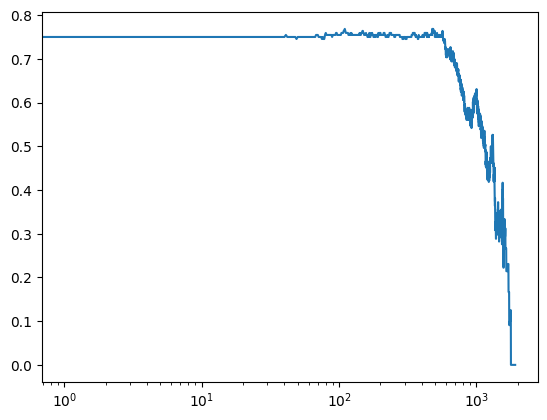

In [11]:
import matplotlib.pyplot as plt
plt.semilogx(onlinac)

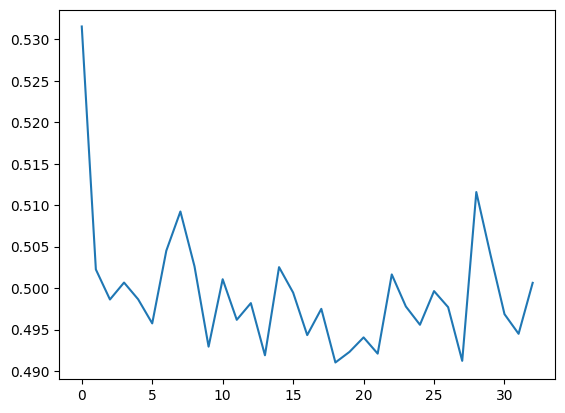

In [12]:
plt.plot(losses)